In [1]:
# for data 
import pandas as pd 
import numpy as np
from pandas import DataFrame

# for graphing and visual aids 
import seaborn as sns
import matplotlib.pyplot as plt

# for testing 
from scipy.stats import stats
from sklearn import preprocessing
from scipy.stats import ttest_ind

In [2]:
# importing csv to dataframe 
# index is first column, CaseOrder
#missing values used for searching for null and any other missing values 
missing_values = ['N/A', 'NA', 'None', 'n/a', 'na', '-', '.', ' ']
medical_df = pd.read_csv('Desktop/medical_clean.csv', index_col =[0], na_values=missing_values)

In [3]:
#change item1 - item8 to survey names, based off data dictionary 
medical_df = medical_df.rename(columns = {'Item1': 'Timely_admission', 
                                          'Item2' : 'Timely_treatment',
                                          'Item3' : 'Timely_visits', 
                                          'Item4' : 'Reliability',
                                          'Item5' : 'Options',
                                          'Item6' : 'Hours_of_treatment', 
                                          'Item7' : 'Courteous_staff', 
                                          'Item8': 'Doc_active_listening'})

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [5]:
# copy to not mess with clean data 
copy_df = medical_df.copy()

In [6]:
n = copy_df.nunique(axis=0)
print(n)

Customer_id             10000
Interaction             10000
UID                     10000
City                     6072
State                      52
County                   1607
Zip                      8612
Lat                      8588
Lng                      8725
Population               5951
Area                        3
TimeZone                   26
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
ReAdmis                     2
VitD_levels              9976
Doc_visits                  9
Full_meals_eaten            8
vitD_supp                   6
Soft_drink                  2
Initial_admin               3
HighBlood                   2
Stroke                      2
Complication_risk           3
Overweight                  2
Arthritis                   2
Diabetes                    2
Hyperlipidemia              2
BackPain                    2
Anxiety   

In [7]:
# cleaning the data -> removing uneeded columns. High cardinality 
to_drop = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
          'Lat', 'Lng', 'Population', 'TimeZone', 'Job']
copy_df = copy_df.drop(columns = to_drop)

In [8]:
# use sklearn to convert 
label_encoder = preprocessing.LabelEncoder()

In [9]:
# iterate through copy_df and change any object to a number 
medical_categories = copy_df.select_dtypes(include='object')
categories_col = medical_categories.columns
print(categories_col)
for c in categories_col:
    copy_df[c] = label_encoder.fit_transform(copy_df[c])

Index(['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


<AxesSubplot:>

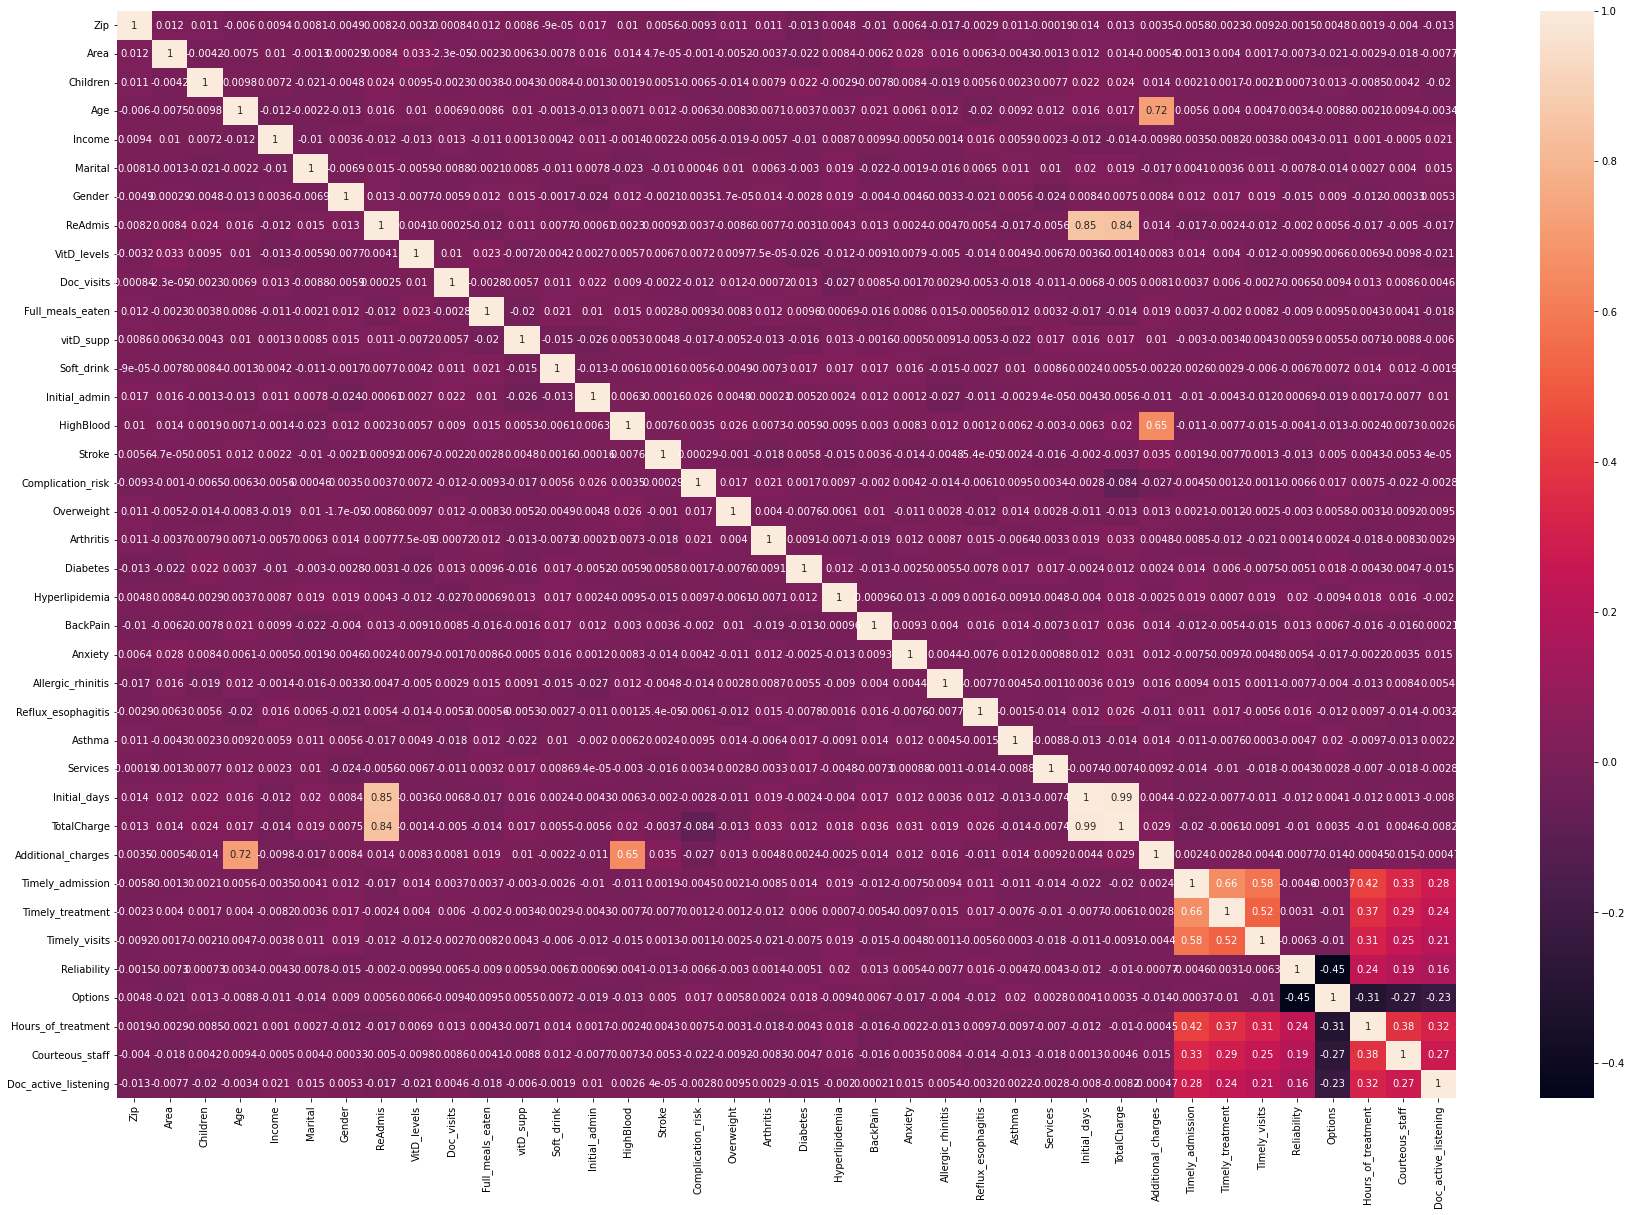

In [10]:
#heatmap for all data 
plt.figure(figsize=(30,20))
sns.heatmap(copy_df.corr(), annot=True)

In [11]:
# ReAdmis -> Initial_days, TotalCharge
# Additional_charges -> Age, HighBlood

In [12]:
correlation = copy_df[['ReAdmis', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Age', 'HighBlood']]

<AxesSubplot:>

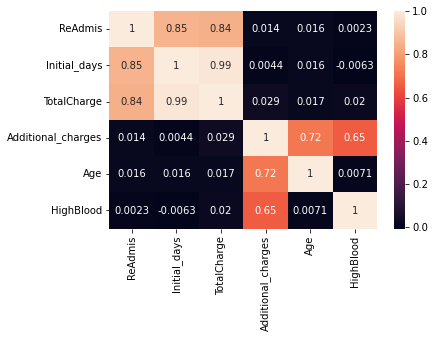

In [13]:
plt.figure()
sns.heatmap(correlation.corr(), annot=True)

In [14]:
# define samples 
group1 = copy_df[copy_df['ReAdmis'] == 1]
group2 = copy_df[copy_df['ReAdmis']== 0]

In [15]:
t_value,p_value = ttest_ind(group1['Initial_days'], group2['Initial_days'])

print('Test statistic: %f'%(t_value))
print('p_value: %f'%p_value)
alpha = 0.05 

if p_value <= alpha: 
    print('\nReadmission is dependent on the amount of initial days spent in hospital')
else: 
    print('Readmission and initial days spent in hospital are not dependent on eachother')
   

Test statistic: 161.932411
p_value: 0.000000

Readmission is dependent on the amount of initial days spent in hospital


# Univariate Statistics 

([<matplotlib.patches.Wedge at 0x7fc80137a130>,
 [Text(-1.0052277398783076, -0.4466734724372488, 'No'),
  Text(1.005227781698892, 0.44667337832103343, 'Yes')],
 [Text(-0.5483060399336223, -0.24364007587486297, '63.31'),
  Text(0.54830606274485, 0.24364002453874548, '36.69')])

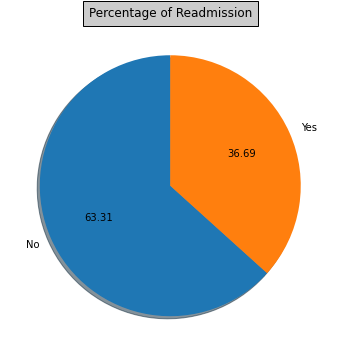

In [16]:
# univariate for category
plt.figure(figsize=(6,6))
plt.title('Percentage of Readmission', bbox={'facecolor': '0.8', 'pad':6})
plt.pie(medical_df['ReAdmis'].value_counts(), startangle=90, autopct='%.2f',
       labels=['No', 'Yes'], shadow=True)

([<matplotlib.patches.Wedge at 0x7fc8213c30a0>,
 [Text(-1.0553536990573813, -0.3102073014709717, 'No'),
  Text(1.055353670013673, 0.31020740028031507, 'Yes')],
 [Text(-0.5756474722131171, -0.16920398262053002, '59.10'),
  Text(0.5756474563710943, 0.16920403651653546, '40.90')])

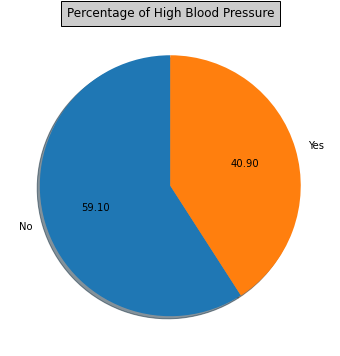

In [17]:
# Univariate for category
plt.figure(figsize=(6,6))
plt.title('Percentage of High Blood Pressure', bbox={'facecolor': '0.8', 'pad':6})
plt.pie(medical_df['HighBlood'].value_counts(), startangle=90, autopct='%.2f',
       labels=['No', 'Yes'], shadow=True)

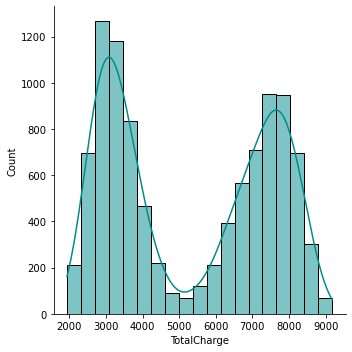

In [18]:
# Univariate for continual 
sns.displot(data=medical_df['TotalCharge'], color='darkcyan', kde=True)

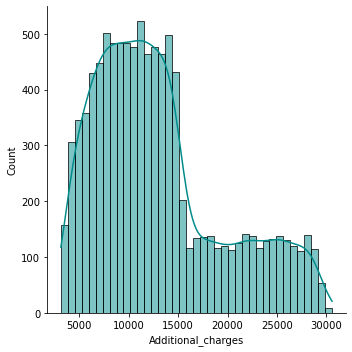

In [19]:
# univariate for continual 
sns.displot(data=medical_df['Additional_charges'], color='darkcyan', kde=True)

# Bivariate Statistics 

In [20]:
# a method for plotting 

def graph_overlay(target, c, height, width):
    medical_df.groupby([c, target]).size().unstack().plot(kind='bar', stacked=True, figsize=(width, height))
    print(pd.crosstab(medical_df[target],
                     medical_df[c],
                     margins = True))

In [21]:
# code to make the graph nicer. Grouping ages into decades. 
medical_df['age_bins'] = pd.cut(x = medical_df['Age'], bins = [9, 19, 29, 39, 49, 59, 69, 79, 89 ])

medical_df['age_by_decade'] = pd.cut(x = medical_df['Age'], bins = [9, 19, 29, 39, 49, 59, 69, 79, 89], 
                                  labels=['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s'])

In [22]:
# information for continual bivariate 

copy_df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [23]:
copy_df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

age_by_decade  Teens   20s   30s   40s   50s   60s   70s   80s    All
HighBlood                                                            
No               173   773   855   859   824   809   822   795   5910
Yes               97   563   564   566   584   573   604   539   4090
All              270  1336  1419  1425  1408  1382  1426  1334  10000


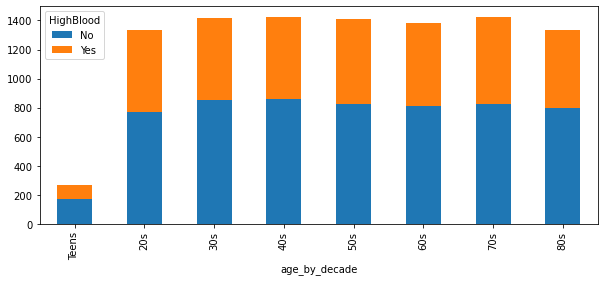

In [24]:
# bivariate for category v. category
# age is dependent on high blood pressure 
graph_overlay('HighBlood', 'age_by_decade', 4,10)

HighBlood    No   Yes    All
ReAdmis                     
No         3747  2584   6331
Yes        2163  1506   3669
All        5910  4090  10000


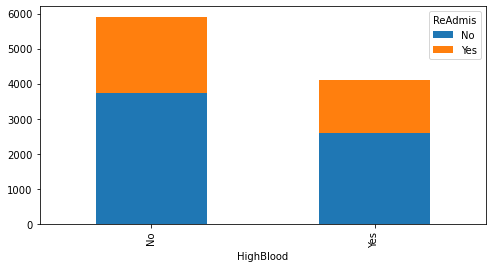

In [25]:
graph_overlay('ReAdmis', 'HighBlood', 4, 8)

<AxesSubplot:xlabel='Initial_days', ylabel='TotalCharge'>

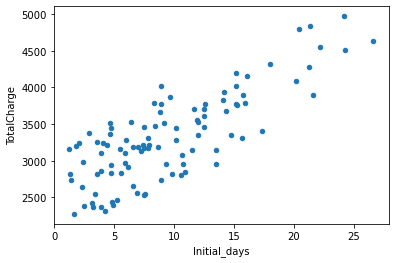

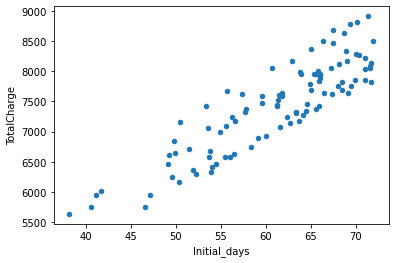

In [26]:
# continual vs. continual 
# initial days - mean is 34.455299
# total charge - mean is 5312.172769
# dependent on eachother 


copy_df[copy_df['Initial_days']<=34.5].sample(100).plot.scatter(x='Initial_days', y='TotalCharge')

copy_df[copy_df['Initial_days'] >= 34.5].sample(100).plot.scatter(x='Initial_days', y='TotalCharge')


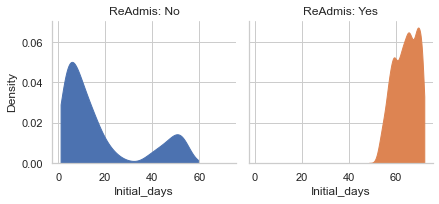

In [27]:
sns.set(style="whitegrid")

g = sns.FacetGrid(medical_df, col='ReAdmis', hue='ReAdmis', col_wrap=3)

g = g.map(sns.kdeplot, "Initial_days", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

g = g.set_titles("ReAdmis: {col_name}")

plt.show()


In [28]:
# Readmission deals with higher charges. 

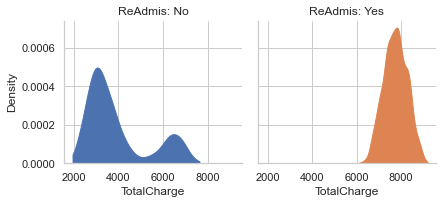

In [29]:
sns.set(style="whitegrid")

g = sns.FacetGrid(medical_df, col='ReAdmis', hue='ReAdmis', col_wrap=3)

g = g.map(sns.kdeplot, "TotalCharge", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

g = g.set_titles("ReAdmis: {col_name}")

plt.show()
